# Entrenamiento y evaluación de modelos con sklearn

<!-- ![a](https://s3-ap-southeast-2.amazonaws.com/chrisdlangton/ghost/2018/05/1_kzmiuypmxgehhxx7slbp4w.jpeg) -->
<img src="https://s3-ap-southeast-2.amazonaws.com/chrisdlangton/ghost/2018/05/1_kzmiuypmxgehhxx7slbp4w.jpeg" width="40%" />

Ahora que comprendes el funcionamiento básico de [Pandas](https://pandas.pydata.org/) y [Numpy](https://numpy.org/), es hora de utilizar [scikit-learn](https://scikit-learn.org/stable/) para generar modelos que nos permitan trabajar con los datos que disponemos.

En particular, aprenderemos sobre cómo entrenar y evaluar modelos, además de los pasos necesarios para poder llevar esto a cabo.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
# Al definir una seed, las funciones aleatorias siempre retornarán el mismo valor
np.random.seed(0)

Primero, cargamos nuestro dataset desde el archivo ``car_insurance_dataset.csv``. Este dataset contiene información sobre distintos clientes de una compañía de seguros estadounidense tales como su edad, nivel de educación, años conduciendo, código postal y otros. Además de esto, el set contiene una última columna que corresponde a si el cliente ha cobrado o no el seguro de su automóvil.

En este tutorial desarrollaremos un modelo que determine si un cliente cobrará o no su seguro basado en múltiples características. Primero, ordenando, limpiando y procesando los datos y luego entrenando a un clasificador para llevar a cabo la tarea.

In [3]:
# Leemos el archivo .csv desde el directorio correspondiente
insurance_data = pd.read_csv("car_insurance_dataset.csv")

# Ordenamos el set de datos dependiendo de si cobraron o no su seguro
insurance_data = insurance_data.sort_values(by=['OUTCOME'])
insurance_data

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
6068,712307,40-64,male,majority,20-29y,university,upper class,0.537015,1.0,before 2015,1.0,1.0,32765,4000.0,sedan,13,0,2,0.0
6067,352678,16-25,male,majority,0-9y,university,middle class,0.478285,1.0,before 2015,1.0,0.0,10238,15000.0,sedan,0,0,0,0.0
6064,734863,65+,female,majority,30y+,high school,upper class,0.613891,1.0,after 2015,1.0,1.0,10238,NaN,sedan,2,0,0,0.0
6063,999261,65+,female,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,12000.0,sedan,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,613310,26-39,male,majority,10-19y,university,upper class,0.396540,0.0,before 2015,0.0,1.0,92101,13000.0,sedan,2,0,0,1.0
6677,881803,16-25,female,majority,0-9y,high school,poverty,0.578306,0.0,before 2015,0.0,1.0,92101,11000.0,sedan,0,0,0,1.0
6678,607163,26-39,female,minority,0-9y,university,upper class,0.633275,1.0,before 2015,0.0,1.0,92101,13000.0,sedan,0,0,0,1.0
6734,167440,16-25,female,majority,0-9y,none,poverty,0.362294,0.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,1.0


In [4]:
# La siguiente función nos permite describir el set de datos con información relevante tal como
# el promedio, desviación estándar y máximo de cada característica
insurance_data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Primero, deberemos definir si la base de datos contiene valores nulos o NaN. Estos valores pueden ser interpretados como un "desconocido" y depende de cada aplicación el que haremos con cada uno de ellos. En nuestro caso, dado que tenemos abundancia de datos, eligiremos por eliminar toda fila que contenga datos nulos.

In [5]:
# Listamos la cantidad de datos nulos por columna
insurance_data.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [6]:
# Eliminamos las filas con datos nulos
insurance_data = insurance_data.drop("ID", axis = 1)    # Eliminamos la característica "ID" ya que no provee información valiosa
insurance_data = insurance_data.dropna()                # Eliminamos las filas con valores nulos
insurance_data

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
6068,40-64,male,majority,20-29y,university,upper class,0.537015,1.0,before 2015,1.0,1.0,32765,4000.0,sedan,13,0,2,0.0
6067,16-25,male,majority,0-9y,university,middle class,0.478285,1.0,before 2015,1.0,0.0,10238,15000.0,sedan,0,0,0,0.0
6058,65+,male,majority,30y+,university,upper class,0.643816,1.0,before 2015,1.0,1.0,10238,5000.0,sedan,6,0,12,0.0
6055,26-39,male,majority,10-19y,university,middle class,0.548835,1.0,before 2015,0.0,0.0,10238,18000.0,sedan,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,26-39,male,majority,10-19y,university,upper class,0.396540,0.0,before 2015,0.0,1.0,92101,13000.0,sedan,2,0,0,1.0
6677,16-25,female,majority,0-9y,high school,poverty,0.578306,0.0,before 2015,0.0,1.0,92101,11000.0,sedan,0,0,0,1.0
6678,26-39,female,minority,0-9y,university,upper class,0.633275,1.0,before 2015,0.0,1.0,92101,13000.0,sedan,0,0,0,1.0
6734,16-25,female,majority,0-9y,none,poverty,0.362294,0.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,1.0


Ahora, revisaremos cuántos valores únicos existen por característica. A mayor cantidad de valores distintos por característica, más crece nuestro espacio de características y se dificulta encontrar una línea de decisión correcta, por lo que siempre trataremos de reducir esta cantidad agrupando los valores o bien transformando las características.

In [7]:
# Números de datos únicos por columna
insurance_data.nunique()

AGE                       4
GENDER                    2
RACE                      2
DRIVING_EXPERIENCE        4
EDUCATION                 3
INCOME                    4
CREDIT_SCORE           8149
VEHICLE_OWNERSHIP         2
VEHICLE_YEAR              2
MARRIED                   2
CHILDREN                  2
POSTAL_CODE               4
ANNUAL_MILEAGE           21
VEHICLE_TYPE              2
SPEEDING_VIOLATIONS      21
DUIS                      7
PAST_ACCIDENTS           15
OUTCOME                   2
dtype: int64

Notamos que un par de columnas tienen grandes cantidades de datos, en especial CREDIT_SCORE, por lo que necesitamos entender a qué se debe esto.

In [8]:
# Describimos las columnas con mayor cantidad de datos distintos
insurance_data[["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]].describe()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,8149.000000,8149.00000,8149.000000,8149.000000,8149.000000
mean,0.516368,11693.45932,1.485581,0.240766,1.065530
std,0.137684,2822.35147,2.244711,0.557408,1.665623
min,0.053358,2000.00000,0.000000,0.000000,0.000000
25%,0.417891,10000.00000,0.000000,0.000000,0.000000
50%,0.526759,12000.00000,0.000000,0.000000,0.000000
75%,0.620074,14000.00000,2.000000,0.000000,2.000000
max,0.960819,22000.00000,22.000000,6.000000,15.000000


A continuación, agruparemos las características en grupos según su valor numérico, pasando de tener decenas de valores distintos para cada columna a solo un par.

In [9]:
names_three = [0, 1, 2]
names_four = [0, 1, 2, 3]

# La función cut nos permite agrupar los valores numéricos de columnas dados un rango de valores para cada grupo que creamos
# bins corresponde al número en que haremos el corte para el siguiente grupo y labels el valor que tomará respectivamente.

insurance_data.loc[:, "CREDIT_SCORE"] = pd.cut(insurance_data["CREDIT_SCORE"], bins = [-1, 0.418, 0.527, 0.62, 1], labels = names_four)
insurance_data.loc[:, "ANNUAL_MILEAGE"] = pd.cut(insurance_data["ANNUAL_MILEAGE"], bins = [-1, 9999, 11999, 13999, 22001], labels = names_four)
insurance_data.loc[:, "SPEEDING_VIOLATIONS"] = pd.cut(insurance_data["SPEEDING_VIOLATIONS"], bins = [-1, 5, 10, 23], labels = names_three)
insurance_data.loc[:, "DUIS"] = pd.cut(insurance_data["DUIS"], bins = [-1, 1, 7], labels = [0, 1])
insurance_data.loc[:, "PAST_ACCIDENTS"] = pd.cut(insurance_data["PAST_ACCIDENTS"], bins = [-1, 0.9, 3, 16], labels = names_three)

Notamos que ahora nuestros datos se encuentran mucho menos repartidos en el espacio, lo que facilitará determinar una línea de decisión

In [10]:
insurance_data

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,3,1.0,after 2015,0.0,1.0,10238,2,sedan,0,0,0,0.0
6068,40-64,male,majority,20-29y,university,upper class,2,1.0,before 2015,1.0,1.0,32765,0,sedan,2,0,1,0.0
6067,16-25,male,majority,0-9y,university,middle class,1,1.0,before 2015,1.0,0.0,10238,3,sedan,0,0,0,0.0
6058,65+,male,majority,30y+,university,upper class,3,1.0,before 2015,1.0,1.0,10238,0,sedan,1,0,2,0.0
6055,26-39,male,majority,10-19y,university,middle class,2,1.0,before 2015,0.0,0.0,10238,3,sedan,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,26-39,male,majority,10-19y,university,upper class,0,0.0,before 2015,0.0,1.0,92101,2,sedan,0,0,0,1.0
6677,16-25,female,majority,0-9y,high school,poverty,2,0.0,before 2015,0.0,1.0,92101,1,sedan,0,0,0,1.0
6678,26-39,female,minority,0-9y,university,upper class,3,1.0,before 2015,0.0,1.0,92101,2,sedan,0,0,0,1.0
6734,16-25,female,majority,0-9y,none,poverty,0,0.0,before 2015,0.0,1.0,10238,1,sedan,0,0,0,1.0


Otro proceso relevante es el de _encodear_ los datos, es decir, transformar todas las características al formato numérico, esto se debe a que los modelos (en general) solo trabajan con valores numéricos y no texto. En las primeras líneas de la siguiente celda mostramos como hacer este proceso a mano, reemplazando el valor "male" de la columna "GENDER" por un 0 y el valor "female" por un 1:

In [11]:
# Reemplazamos el valor 'male' por un 0 y el valor 'female' por un 1
insurance_data["GENDER"].replace("male", 0, inplace=True)
insurance_data["GENDER"].replace("female", 1, inplace=True)

# Podemos hacer este proceso más eficiente mediante un for-loop:
for column_name in insurance_data.columns:
    insurance_data[column_name] = insurance_data[column_name].astype('category').cat.codes

Ahora nuestros datos se encuentran en formato numérico :)

In [12]:
insurance_data

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,1,0,0,0,2,3,1,0,0,1,0,2,0,0,0,0,0
6068,2,0,0,2,2,2,2,1,1,1,1,2,0,0,2,0,1,0
6067,0,0,0,0,2,0,1,1,1,1,0,0,3,0,0,0,0,0
6058,3,0,0,3,2,2,3,1,1,1,1,0,0,0,1,0,2,0
6055,1,0,0,1,2,0,2,1,1,0,0,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,1,0,0,1,2,2,0,0,1,0,1,3,2,0,0,0,0,1
6677,0,1,0,0,0,1,2,0,1,0,1,3,1,0,0,0,0,1
6678,1,1,1,0,2,2,3,1,1,0,1,3,2,0,0,0,0,1
6734,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1


Una vez hemos procesado nuestros datos, crearemos la matrix de características _X_ y el vector con las etiquetas _y_, además, separaremos los datos entre un set de entrenamiento y uno de testeo utilizando una proporción común de 2:1 (dos tercios de los datos se usan para entrenar y un tercio para testear)

In [13]:
X = insurance_data.drop("OUTCOME", axis=1)
y = insurance_data["OUTCOME"]

In [14]:
# Método "a mano"
test_size = 0.33 # Proporción de los datos que usaremos para testeo (entre 0 y 1)
n_train = int(insurance_data.shape[0] * (1 - test_size))   # Número de datos en el set de entrenamiento

X_train = X.iloc[:n_train]  # Creamos los datos para entrenar
X_test = X.iloc[n_train:]   # Creamos los datos para testear

y_train = y.iloc[:n_train]  # Creamos las labels del set de entrenamiento
y_test = y.iloc[n_train:]   # Creamos las labels del set de testeo

In [15]:
# Calculamos las proporciones de cada clase para cada set
proportions_train = y_train.value_counts() / len(y_train)
proportions_test = y_test.value_counts() / len(y_test)

print("Proporciones para el set de entrenamiento:\n", proportions_train)
print("Proporciones para el set de testeo:\n", proportions_test)

Proporciones para el set de entrenamiento:
 0    1.0
Name: OUTCOME, dtype: float64
Proporciones para el set de testeo:
 1    0.942751
0    0.057249
Name: OUTCOME, dtype: float64


Notamos instantáneamente que la separación a mano usa solamente datos negativos (con etiqueta = 0) para entrenar, esto es debido a la forma en que separamos el conjunto, que ya estaba ordenado de antemano. Normalmente vamos a "revolver" los datos antes de repartirlos en los distintos sets.

Para nuestra fortuna, sklearn posee un método que nos permite hacer esto directamente llamado ``train_test_split()``

In [16]:
# Método de sklearn, preferible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

In [17]:
# Calculamos las proporciones de cada clase para cada set
proportions_train = y_train.value_counts() / len(y_train)
proportions_test = y_test.value_counts() / len(y_test)

print("Proporciones para el set de entrenamiento:\n", proportions_train)
print("Proporciones para el set de testeo:\n", proportions_test)

Proporciones para el set de entrenamiento:
 0    0.692618
1    0.307382
Name: OUTCOME, dtype: float64
Proporciones para el set de testeo:
 0    0.681041
1    0.318959
Name: OUTCOME, dtype: float64


Finalmente podemos entrenar un clasificador con nuestros datos, notamos que no usamos un set de validación ya que no vamos a cambiar parámetros de nuestro modelo. Normalmente, en un escenario real preferiríamos si hacerlo a modo de maximizar el desempeño general.

In [18]:
# Creamos un clasificador de Support Vector Machine (que estudiaremos en el futuro)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)        # Ajustamos el clasificador a nuestros datos
y_pred = svm_classifier.predict(X_test)     # Predecimos el clasificador en nuestro set de testeo

Ahora, calculamos el desempeño según el rendimiento o _accuracy_, que corresponde al número de predicciones correctas.

In [19]:
accuracy_manual = np.sum(y_test == y_pred)/len(y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy calculada a mano:", accuracy_manual)
print("Accuracy calculada por sklearn:", accuracy)

Accuracy calculada a mano: 0.845724907063197
Accuracy calculada por sklearn: 0.845724907063197


Luego, armamos la matriz de confusión de nuestro clasificador utilizando el método de _sklearn_, que nos permite observar en mejor detalle qué datos están siendo predichos de que manera.

Cada celda de la matriz de confusión nos otorga información distinta, estas corresponden a:

- Esquina superior-izquierda: **Verdaderos positivos** (TP, True Positives), corresponde a los datos **correctamente clasificados como positivos**

- Esquina superior-derecha: **Falsos positivos** (FP, False Positives), corresponde a los datos **incorrectamente clasificados como positivos**

- Esquina inferior-derecha: **Verdaderos negativos** (TN, True Negatives), corresponde a los datos **correctamente clasificados como negativos**

- Esquina inferior-izquierda: **Falsos negativos** (FN, False Negatives), corresponde a los datos **incorrectamente clasificados como negativos**

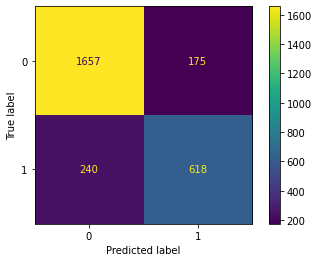

In [20]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

Utilizando estos valores, podemos determinar algunas métricas comunes para comparar clasificadores pueden ser calculadas desde la matriz de confusión, algunas de ellas son:

- *True Positive Rate* (TPR): Nos determina qué fracción de los datos que pertenecen a la clase positiva correctamente clasificamos como positivos.
$$TPR = \frac{TP}{TP + FN}$$

- *False Positive Rate* (FPR): Nos determina qué fracción de los datos que pertenecen a la clase negativa correctamente clasificamos como negativos.
$$FPR = \frac{FP}{TN + FP}$$

- *Accuracy*: Nos determina que fracción de las clasificaciónes llevadas a cabo son correctas (verdaderos).
$$A = \frac{TP+TN}{N+P}$$

- *Precisión*: Nos determina qué fracción de las clases que determinamos como positivas realmente son positivas
$$P = \frac{TP}{TP + FP}$$

In [21]:
true_positives = cm[1, 1]
true_negatives = cm[0, 0]

false_positives = cm[0, 1]
false_negatives = cm[1, 0]

tpr = true_positives / (true_positives + false_negatives)
fpr = false_positives / (true_negatives + false_positives)

print("True Positive Rate del modelo:", tpr)
print("False Positive Rate del modelo:", fpr)

True Positive Rate del modelo: 0.7202797202797203
False Positive Rate del modelo: 0.09552401746724891


In [22]:
precision = true_positives / (true_positives + false_positives)

print("Precisión del modelo", precision)
print("Recall del modelo:", tpr)

Precisión del modelo 0.7793190416141236
Recall del modelo: 0.7202797202797203


## Conclusiones

- Es siempre importante conocer tanto cuantitativamente como cualitativamente los datos con que trabajamos.
- Los datos deben siempre ser preprocesados: removiendo datos nulos, características poco relevantes para la tarea o transformando características para extraer otros tipos de información de ellas.
- Es importante separar los sets de entrenamiento, validación y evaluación de forma adecuada (procurando una mayoría para entrenamiento y una muestra suficientemente representativa para validació/evaluación).
- Existen múltiples métricas para medir el desempeño de un modelo, la relevancia de cada una vendrá dada por los requisitos de nuestro problema y objetivos del modelo.